file infor：
<open DatasetReader name='/Users/a1234/Desktop/workspace/*RL_AUV_2024/Data/gebco_2024_sub_ice_topo_geotiff/gebco_2024_sub_ice_n0.0_s-90.0_w-90.0_e0.0.tif' mode='r'>


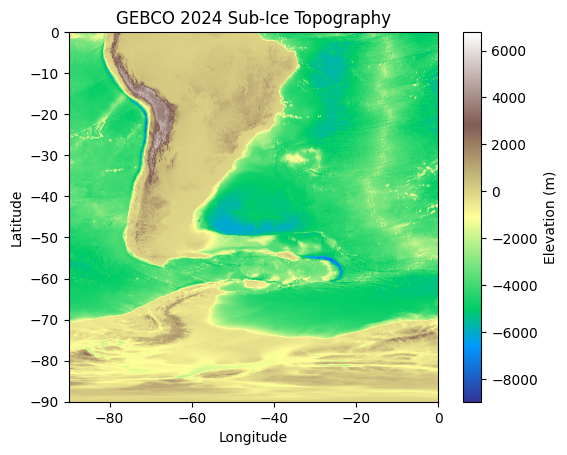

In [5]:
import rasterio
import matplotlib.pyplot as plt

tif_path = '/Users/a1234/Desktop/workspace/*RL_AUV_2024/Data/gebco_2024_sub_ice_topo_geotiff/gebco_2024_sub_ice_n0.0_s-90.0_w-90.0_e0.0.tif'

# rasterio加载GeoTIFF文件
with rasterio.open(tif_path) as dataset:
    elevation_data = dataset.read(1)  # 假设地形数据在第一波段

    # 获取地理边界信息
    bounds = dataset.bounds
    extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]

    print(f"file infor：\n{dataset}")

plt.imshow(elevation_data, cmap='terrain', extent=extent)
plt.colorbar(label='Elevation (m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GEBCO 2024 Sub-Ice Topography ()')
plt.show()
# 从北纬 0° 到南纬 -90°、西经 -90° 到东经 0° 的区域
# The area from 0° North latitude to -90° South latitude and from -90° West longitude to 0° East longitude.

File information:
<open DatasetReader name='/Users/a1234/Desktop/workspace/*RL_AUV_2024/Data/gebco_2024_sub_ice_topo_geotiff/gebco_2024_sub_ice_n0.0_s-90.0_w-90.0_e0.0.tif' mode='r'>
Geographic extent: Left -90.0°, Right 0.0°, Bottom -90.0°, Top 1.8947517166356675e-15°
Data dimensions: Width 21600 pixels, Height 21600 pixels
Coordinate reference system: EPSG:4326
Elevation data statistics:
Minimum value (lowest point): -8976 m
Maximum value (highest point): 6787 m
Mean value: -2363.99 m
Data type: int16
Sample elevation data from the top-left 5x5 pixels:
[[-877 -896 -920 -943 -965]
 [-856 -877 -902 -927 -949]
 [-844 -867 -892 -916 -937]
 [-839 -861 -886 -909 -930]
 [-841 -863 -886 -907 -927]]


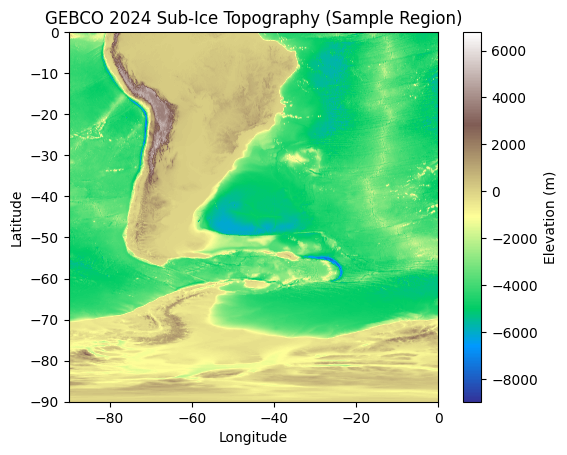

In [2]:
import rasterio
import matplotlib.pyplot as plt

tif_path = '/Users/a1234/Desktop/workspace/*RL_AUV_2024/Data/gebco_2024_sub_ice_topo_geotiff/gebco_2024_sub_ice_n0.0_s-90.0_w-90.0_e0.0.tif'

# Load the GeoTIFF file with rasterio
with rasterio.open(tif_path) as dataset:
    # Read elevation data from the first band (assumes elevation data is in the first band)
    elevation_data = dataset.read(1)

    # Retrieve geographic boundary information
    bounds = dataset.bounds
    extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]

    # Print file information
    print(f"File information:\n{dataset}")
    print(f"Geographic extent: Left {bounds.left}°, Right {bounds.right}°, Bottom {bounds.bottom}°, Top {bounds.top}°")
    print(f"Data dimensions: Width {dataset.width} pixels, Height {dataset.height} pixels")
    print(f"Coordinate reference system: {dataset.crs}")
    
    # Print basic statistics of elevation data
    print("Elevation data statistics:")
    print(f"Minimum value (lowest point): {elevation_data.min()} m")
    print(f"Maximum value (highest point): {elevation_data.max()} m")
    print(f"Mean value: {elevation_data.mean():.2f} m")
    print(f"Data type: {elevation_data.dtype}")

    # Print sample elevation data from the top-left 5x5 pixels
    print("Sample elevation data from the top-left 5x5 pixels:")
    print(elevation_data[:5, :5])

# Visualize elevation data
plt.imshow(elevation_data, cmap='terrain', extent=extent)
plt.colorbar(label='Elevation (m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GEBCO 2024 Sub-Ice Topography (Sample Region)')
plt.show()


Input:
Latitude range: 25.0 to 52.0
Longitude range: -82.0 to -55.0
Elevation range: -5000m to 0m

--------------------------------------------------

Loading file: /Users/a1234/Desktop/workspace/*RL_AUV_2024/Data/gebco_2024_sub_ice_topo_geotiff/gebco_2024_sub_ice_n90.0_s0.0_w-90.0_e0.0.tif
Full file elevation data statistics:
Minimum value (lowest point): -8882 m
Maximum value (highest point): 5654 m
Mean value: -1945.89 m
Data type: int16
Sample elevation data from the top-left 5x5 pixels in the full file:
[[-4225 -4226 -4227 -4228 -4228]
 [-4225 -4226 -4227 -4228 -4228]
 [-4225 -4226 -4227 -4228 -4228]
 [-4225 -4226 -4227 -4228 -4228]
 [-4226 -4227 -4227 -4228 -4228]]

--------------------------------------------------

Cropped elevation data statistics:
Minimum value (lowest point): -5000.0 m
Maximum value (highest point): 0.0 m
Mean value: -2354.69 m
Data type: float64

--------------------------------------------------


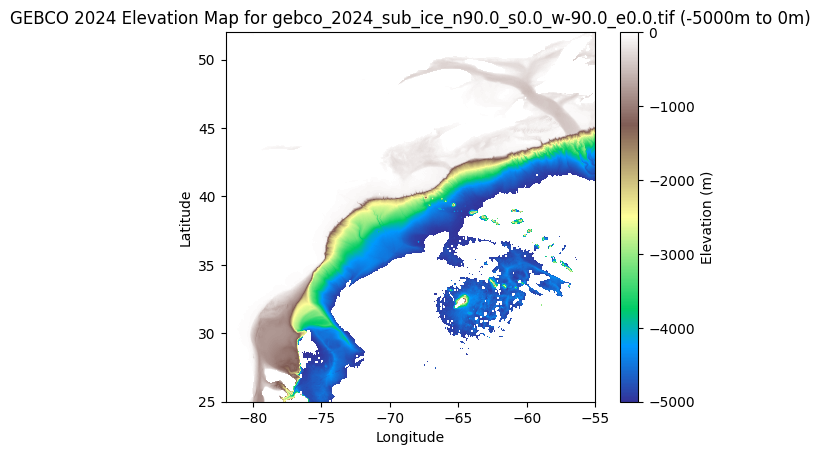

In [16]:
import rasterio
import matplotlib.pyplot as plt
import glob
import numpy as np
import re

# Folder containing your GeoTIFF files
folder_path = '/Users/a1234/Desktop/workspace/*RL_AUV_2024/Data/gebco_2024_sub_ice_topo_geotiff/'

# Get list of all .tif files in the folder
file_paths = glob.glob(folder_path + '/*.tif')

def Get_GeoTIFF_Data(lat_min, lat_max, lon_min, lon_max, elev_min, elev_max):
    for file_path in file_paths:
        file_name = file_path.split('/')[-1]
        
        # Use regular expressions to extract the boundaries from the file name
        match = re.search(r'n(-?\d+(\.\d+)?)_s(-?\d+(\.\d+)?)_w(-?\d+(\.\d+)?)_e(-?\d+(\.\d+)?)', file_name)
        
        if match:
            n = float(match.group(1))  # Northern boundary
            s = float(match.group(3))  # Southern boundary
            w = float(match.group(5))  # Western boundary
            e = float(match.group(7))  # Eastern boundary
            
            # Check if the file covers the input latitude and longitude range
            if (s <= lat_min <= n or s <= lat_max <= n) and (w <= lon_min <= e or w <= lon_max <= e):
                print(f"Loading file: {file_path}")
                with rasterio.open(file_path) as dataset:
                    # Read the entire elevation data from the first band
                    full_elevation_data = dataset.read(1)
                    
                    # Output full file statistics
                    print("Full file elevation data statistics:")
                    print(f"Minimum value (lowest point): {full_elevation_data.min()} m")
                    print(f"Maximum value (highest point): {full_elevation_data.max()} m")
                    print(f"Mean value: {full_elevation_data.mean():.2f} m")
                    print(f"Data type: {full_elevation_data.dtype}")
                    
                    # Print sample data from the top-left 5x5 pixels in the full file
                    print("Sample elevation data from the top-left 5x5 pixels in the full file:")
                    print(full_elevation_data[:5, :5])
                    
                    # Separator
                    print("\n" + "-"*50 + "\n")
                    
                    # Calculate the window for the specified latitude and longitude range
                    window = dataset.window(lon_min, lat_min, lon_max, lat_max)
                    
                    # Read and crop the elevation data based on the window
                    elevation_data = dataset.read(1, window=window)
                    
                    # Apply elevation filter to the cropped data
                    filtered_data = np.where((elevation_data >= elev_min) & (elevation_data <= elev_max), elevation_data, np.nan)
                    
                    # Calculate the extent of the cropped region for plotting
                    left, bottom, right, top = dataset.window_bounds(window)
                    extent = [left, right, bottom, top]
                    
                    # Output cropped area statistics
                    print("Cropped elevation data statistics:")
                    print(f"Minimum value (lowest point): {np.nanmin(filtered_data)} m")
                    print(f"Maximum value (highest point): {np.nanmax(filtered_data)} m")
                    print(f"Mean value: {np.nanmean(filtered_data):.2f} m")
                    print(f"Data type: {filtered_data.dtype}")
                    print("\n" + "-"*50 + "\n")
                    
                    # Visualize the filtered data within the specified extent
                    plt.imshow(filtered_data, cmap='terrain', extent=extent)
                    plt.colorbar(label='Elevation (m)')
                    plt.xlabel('Longitude')
                    plt.ylabel('Latitude')
                    plt.title(f'GEBCO 2024 Elevation Map for {file_name} ({elev_min}m to {elev_max}m)')
                    plt.show()
                return  # Exit after finding the first matching file
    
    # If no file is found
    print("No matching file found for the specified coordinates.")

# input values for latitude, longitude, and elevation ranges
lat_min = 25.0    # Minimum latitude (Florida region)
lat_max = 52.0    # Maximum latitude (Newfoundland and Labrador region)
lon_min = -82.0   # Minimum longitude (Florida coast)
lon_max = -55.0   # Maximum longitude (Canadian Atlantic coast)
elev_min = -5000  # Minimum elevation (deep Atlantic basin)
elev_max = 0      # Maximum elevation (sea level along the coast)


# Display example input
print("Input:")
print(f"Latitude range: {lat_min} to {lat_max}")
print(f"Longitude range: {lon_min} to {lon_max}")
print(f"Elevation range: {elev_min}m to {elev_max}m")
print("\n" + "-"*50 + "\n")

# Find the file and visualize data within the specified range
Get_GeoTIFF_Data(lat_min, lat_max, lon_min, lon_max, elev_min, elev_max)